In [2]:
# 01_data_cleaning_eda.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure plots display in notebook
%matplotlib inline

# Load dataset
df = pd.read_csv('../data/Placement_Data_Full_Class.csv')

# Rename columns for ease
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Display first rows
df.head()


,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [7]:
df.isnull().sum()   # 'salary' has missing values

# Fill salary = 0 where not placed
df['salary'] = df.apply(lambda row: 0 if row['placement_status'] == 'Not Placed' else row['salary'], axis=1)


In [9]:
# Encode gender: M → 1, F → 0
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Encode placement_status: Placed → 1, Not Placed → 0
df['placement_status'] = df['placement_status'].map({'placed': 1, 'not_placed': 0})

# Convert 'degree' and 'stream' columns to category codes
df['degree'] = df['degree'].astype('category').cat.codes
df['stream'] = df['stream'].astype('category').cat.codes

# Convert 'college_name' to category codes (optional if many unique names)
df['college_name'] = df['college_name'].astype('category').cat.codes

# Preview result
print("\nEncoded DataFrame:")
print(df.head())



Encoded DataFrame:
   id             name  gender  age  degree  stream  college_name  \
0   1         John Doe     NaN   25       0       0             5   
1   2       Jane Smith     NaN   24       0       1             7   
2   3  Michael Johnson     NaN   26       0       4            11   
3   4      Emily Davis     NaN   23       0       3            43   
4   5      David Brown     NaN   24       0       0             9   

   placement_status  salary  gpa  years_of_experience  
0               NaN   60000  3.7                  2.0  
1               NaN   65000  3.6                  1.0  
2               NaN   58000  3.8                  3.0  
3               NaN       0  3.5                  2.0  
4               NaN   62000  3.9                  2.0  


In [10]:
df.info()
df.duplicated().sum()  # Should be 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               0 non-null      float64
 3   age                  700 non-null    int64  
 4   degree               700 non-null    int8   
 5   stream               700 non-null    int8   
 6   college_name         700 non-null    int8   
 7   placement_status     0 non-null      float64
 8   salary               700 non-null    int64  
 9   gpa                  700 non-null    float64
 10  years_of_experience  699 non-null    float64
dtypes: float64(4), int64(3), int8(3), object(1)
memory usage: 45.9+ KB


np.int64(0)

In [11]:
df.describe()


,id,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
count,700.00000,0.0,700.000000,700.0,700.000000,700.000000,0.0,700.000000,700.000000,699.000000
mean,350.50000,NaN,24.411429,0.0,1.762857,27.068571,NaN,52474.285714,3.750429,2.177396
std,202.21688,NaN,1.164268,0.0,1.476877,9.278454,NaN,25160.331005,0.121212,0.779393
min,1.00000,NaN,23.000000,0.0,0.000000,0.000000,NaN,0.000000,3.400000,1.000000
25%,175.75000,NaN,23.000000,0.0,0.000000,20.000000,NaN,61000.000000,3.700000,2.000000
50%,350.50000,NaN,24.000000,0.0,2.000000,27.000000,NaN,64000.000000,3.800000,2.000000
75%,525.25000,NaN,26.000000,0.0,3.000000,34.000000,NaN,66000.000000,3.900000,3.000000
max,700.00000,NaN,26.000000,0.0,4.000000,43.000000,NaN,68000.000000,3.900000,3.000000


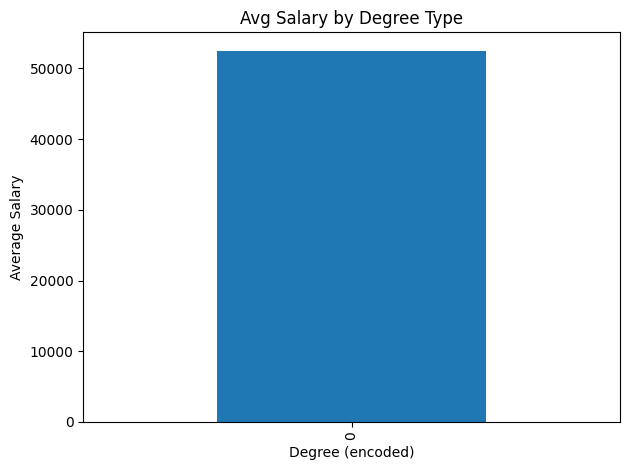

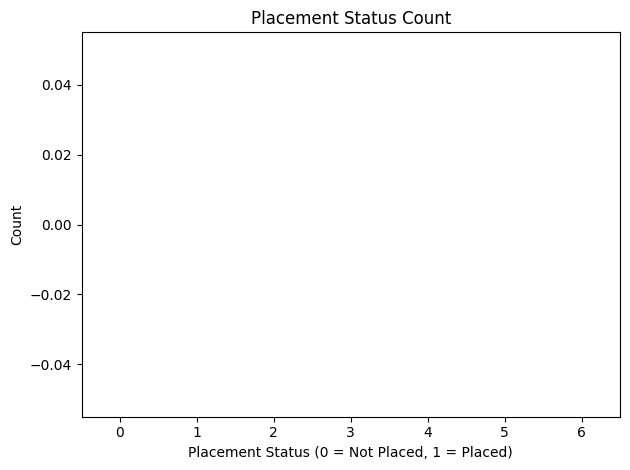

In [13]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create output directory if it doesn't exist
if not os.path.exists('../outputs/plots'):
    os.makedirs('../outputs/plots')

# Bar chart: average salary by degree
df.groupby('degree')['salary'].mean().plot(kind='bar', title='Avg Salary by Degree Type')
plt.ylabel('Average Salary')
plt.xlabel('Degree (encoded)')
plt.tight_layout()
plt.savefig('../outputs/plots/bar_degree_salary.png')
plt.show()

# Countplot: placement status
sns.countplot(x='placement_status', data=df)
plt.title('Placement Status Count')
plt.xlabel('Placement Status (0 = Not Placed, 1 = Placed)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../outputs/plots/count_placement_status.png')
plt.show()


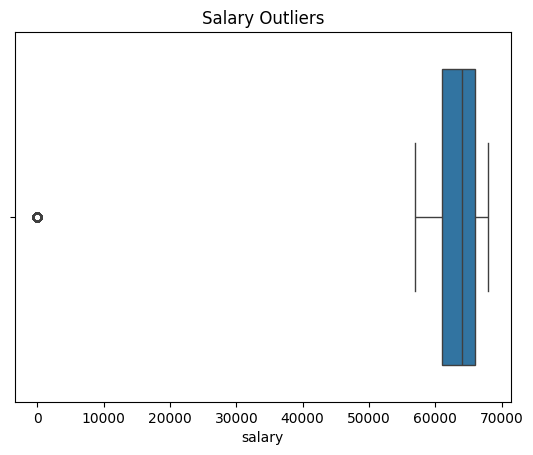

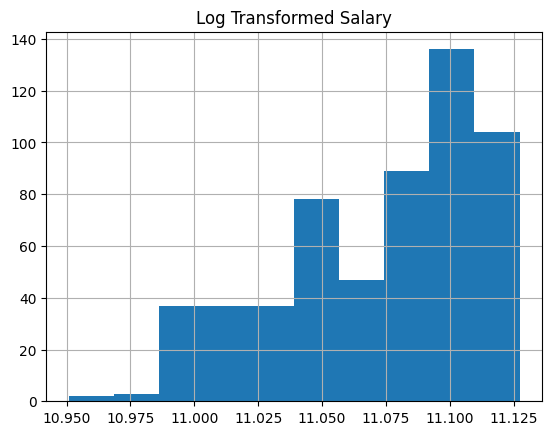

In [14]:
# Boxplot
sns.boxplot(x=df['salary'])
plt.title("Salary Outliers")
plt.savefig('../outputs/plots/box_salary.png')
plt.show()

# Log transformation
df['salary_log'] = df['salary'].replace(0, np.nan).apply(np.log)
df['salary_log'].hist()
plt.title('Log Transformed Salary')
plt.savefig('../outputs/plots/log_salary.png')
plt.show()


In [15]:
df.to_csv('../outputs/cleaned_data.csv', index=False)
